In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class TimeSeriesData():
    
    def __init__(self, num_points, xmin, xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax - xmin) / num_points
        self.x_data = np.linspace(xmin, xmax, num_points)
        self.y_data = np.sin(self.x_data)
    
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        # Create random entry point for the batch
        rand_start = np.random.rand(batch_size, 1)
        # Convert the random generated values on to time-series
        ts_start = rand_start * (self.xmax - self.xmin - (steps*self.resolution))
        # Convert the timeseries on the taxis
        batch_ts = ts_start + np.arange(0.0, steps+1) * self.resolution
        # Create Y data for time series in batches
        y_batch = np.sin(batch_ts)
        # Format for RNN
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

In [5]:
obj = TimeSeriesData(100, 0, 10)

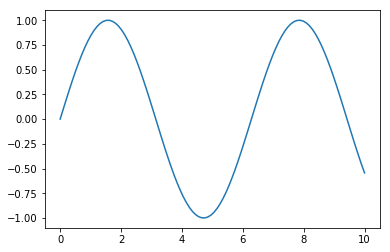

In [15]:
plt.plot(obj.x_data, obj.y_data)

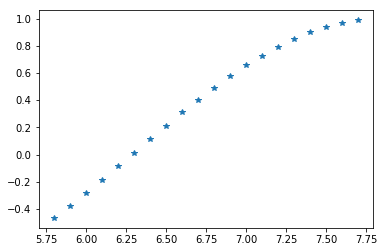

In [34]:
num_time_steps = 20
y1, y2, ts = obj.next_batch(1, num_time_steps, True)
plt.plot(ts.flatten()[1:], y2.flatten(), '*' )

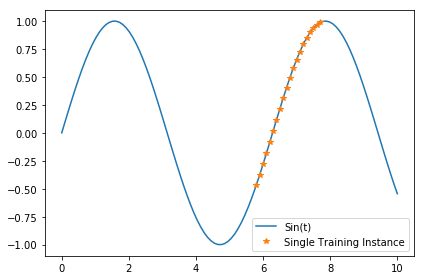

In [35]:
plt.plot(obj.x_data,obj.y_data,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label='Single Training Instance')
plt.legend()
plt.tight_layout()